In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter("ignore")

- trn_X_20231211_final_col_01_transformed.csv, trn_y_20231211_final_col_01_transformed.csv 데이터 셋을 사용

In [24]:
X_trn = pd.read_csv("/home/sangjun/work/temp/trn_X_20231211_final_col_01_transformed.csv")
X_origin = X_trn.copy()
y_trn = pd.read_csv("/home/sangjun/work/temp/trn_y_20231211_final_col_01_transformed.csv")

사용할 feature

In [25]:
num_features = ['HE_chol', 'HE_Bplt', 'HE_wt', 'HE_ht', 'HE_RBC', 'HE_HDL_st2', 'HE_HB', 'age', 'HE_Uph', 'HE_crea', 'HE_Usg', 'HE_WBC', 'HE_TG', 'HE_alt', 'HE_ast',
 'HE_HCT', 'HE_dbp', 'HE_glu', 'HE_BUN', 'ainc', 'HE_sbp', 'HE_wc']
onehot_features = ['BO2_1', 'educ', 'BH1', 'EC_stt_2', 'sex', 'HE_Unitr', 'LQ4_00', 'DI1_pt', 'BM1_5', 'DE1_pt', 'DJ4_pt', 'HE_Ubld', 'LQ1_sb', 'BM1_8', 'occp', 'DI2_pr',
 'BD1', 'marri_1', 'DI3_pr', 'BM1_3', 'EC_occp', 'BM1_4', 'live_t', 'HE_Ubil', 'BH2_61', 'DI1_pr', 'EC_stt_1', 'BM1_7', 'DJ4_pr', 'DE1_pr', 'HE_Uglu',
 'HE_Uro', 'HE_Upro', 'HE_Uket', 'HE_obe', 'HE_rPLS', 'BO1_1', 'BO1', 'D_2_1', 'BM1_1', 'npins', 'LQ2_ab', 'BH9_11', 'tins', 'DI2_pt', 'BM1_2',
 'DI3_pt', 'BS8_2', 'BS9_2', 'BM1_6']
label_features = ['BD1_11', 'incm', 'ho_incm', 'incm5', 'ho_incm5',
 'D_1_1',
  'cfam', 'BA2_13', 'BS3_1', 'DI3_2', 'house', 'BA2_12', 'BE3_31', 'edu', 'BD2_1', 'BE5_1']
y_related =["BP_PHQ_1","BP_PHQ_2","BP_PHQ_3","BP_PHQ_4","BP_PHQ_5","BP_PHQ_6","BP_PHQ_7","BP_PHQ_8","BP_PHQ_9","mh_PHQ_S","BP6_10","BP6_31","DF2_pr","DF2_pt","BP1"]
y = "depressed"

In [26]:
X_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26852 entries, 0 to 26851
Columns: 208 entries, age to DI3_pt_8.0
dtypes: bool(170), float64(38)
memory usage: 12.1 MB


In [27]:
X_over = X_trn
y_over = y_trn

In [28]:
X_over.shape, y_over.shape,

((26852, 208), (26852, 1))

노트북 파일이다 보니 그때 그때 삭제할 컬럼을 바로 삭제했습니다. 예시로 Top2인 컬럼 "BS9_2_8.0"을 삭제

In [29]:
# X_over = X_over.drop("D_1_1", axis=1)

In [30]:
# X_test_over.shape, y_test_over.shape

- RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [51]:
# 5가지의 scoring을 볼 예정
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=2023)
# StratifiedKFold를 사용하
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

# 교차 검증
results = cross_validate(clf, X_over, y_over, scoring=scoring, cv=cv) # 5fold

# 결과 출력
results_df = pd.DataFrame(results)
pd.concat([results_df, results_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,9.806226,0.461745,0.810464,0.841179,0.765363,0.801482,0.898217
1,9.504344,0.463720,0.805623,0.839818,0.755398,0.795374,0.890734
2,9.470425,0.463415,0.801862,0.834503,0.753073,0.791699,0.886375
3,9.508559,0.466723,0.808194,0.841801,0.759032,0.798277,0.894818
4,9.814608,0.484793,0.815270,0.850228,0.765363,0.805566,0.898758
mean,9.620832,0.468079,0.808282,0.841506,0.759646,0.798480,0.893780
std,0.173722,0.009514,0.005047,0.005660,0.005635,0.005359,0.005236


- 왜 5fold로 나누었는데 갈수록 값이 증가할까? -> StratifiedKFold가 적용이 안되어서다.


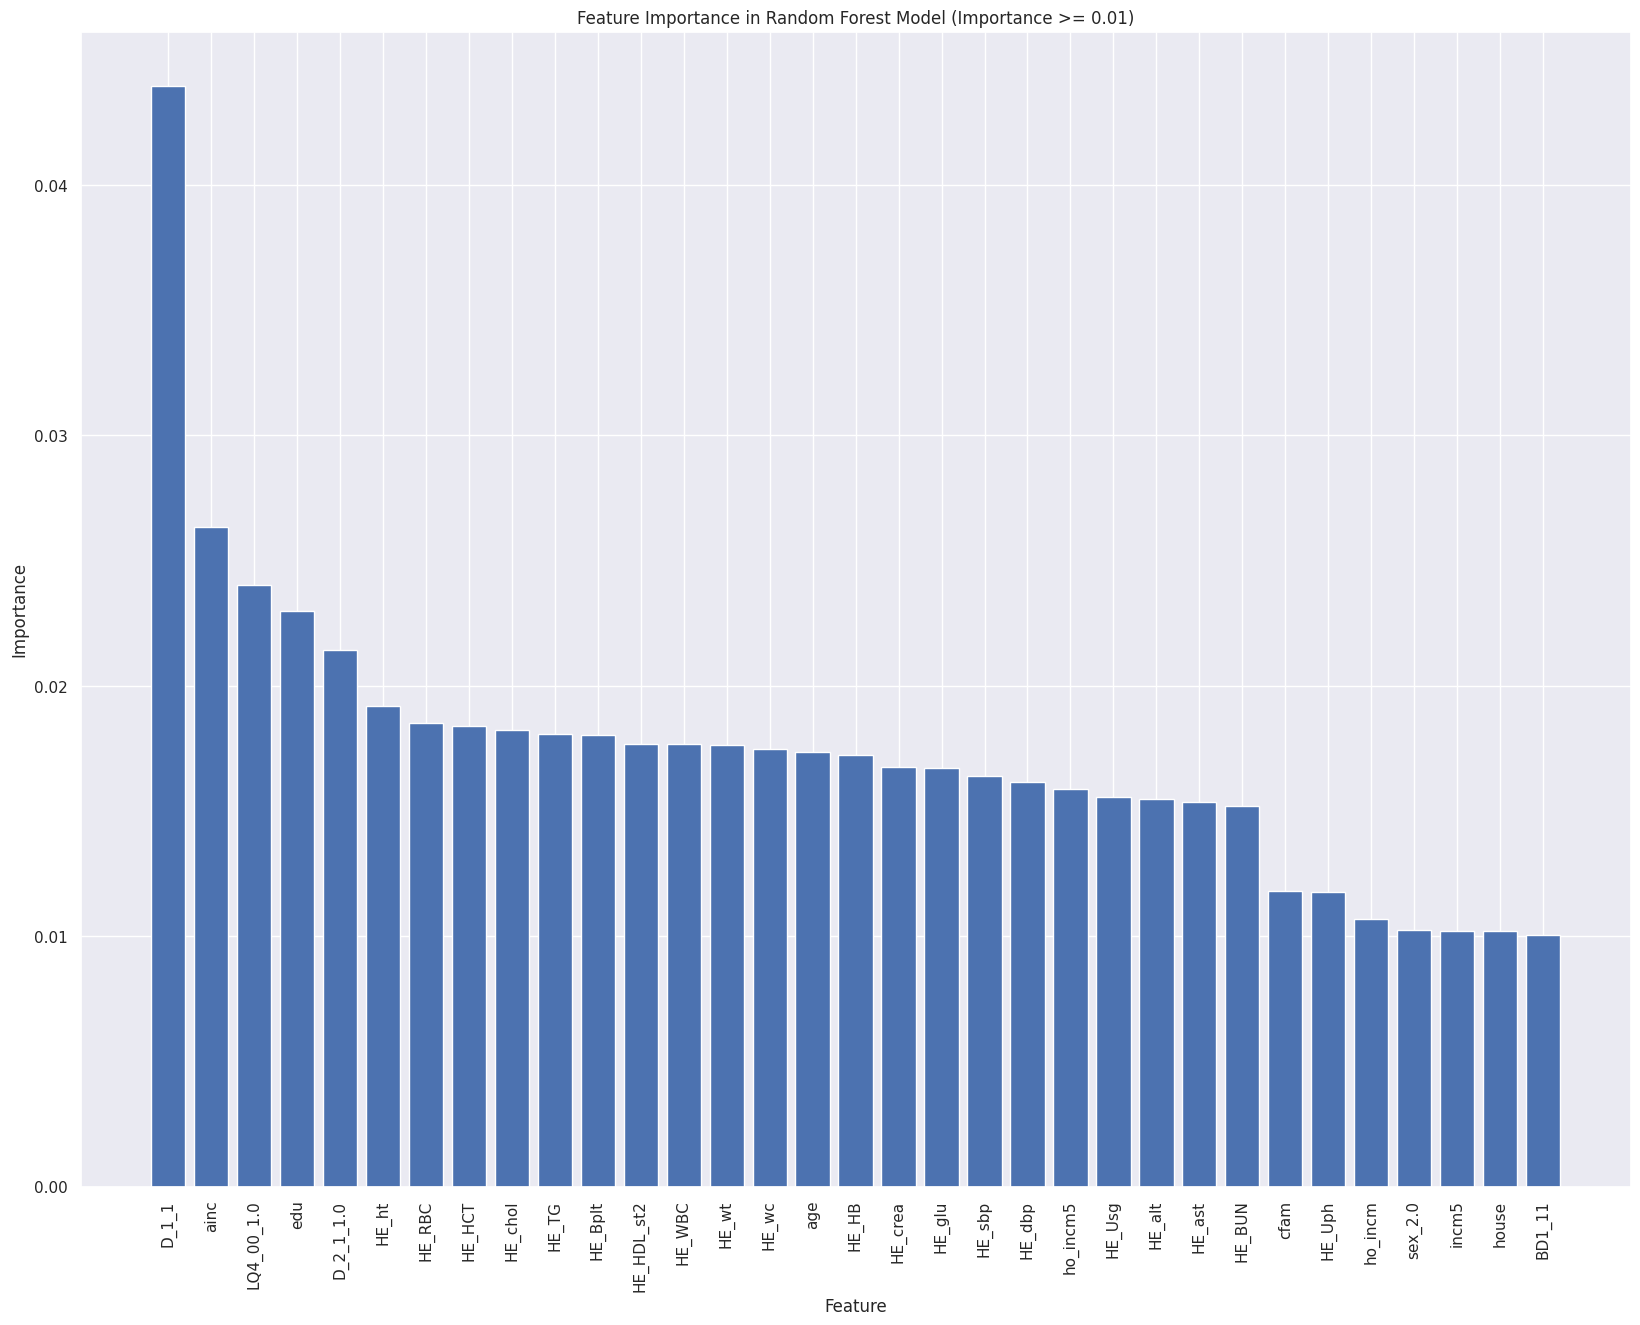

In [32]:
# 사용 모델
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

model.fit(X_over, y_over)

# Feature 중요도 계산
feature_importances = model.feature_importances_

# 중요도가 0.01 이상인 feature만 선택
selected_features = X_over.columns[feature_importances >= 0.01]

# 중요도를 DataFrame으로 변환
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_over.columns,
    'Importance': feature_importances
})

# Feature 중요도 시각화
selected_idx = np.argsort(feature_importances[feature_importances >= 0.01])[::-1]

plt.bar(range(len(selected_features)), feature_importances[feature_importances >= 0.01][selected_idx], align="center")
plt.xticks(range(len(selected_features)), selected_features[selected_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model (Importance >= 0.01)")
plt.show()

In [33]:
rf_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
29,D_1_1,0.043929
1,ainc,0.026334
165,LQ4_00_1.0,0.024012
26,edu,0.022980
117,D_2_1_1.0,0.021431
4,HE_ht,0.019170
18,HE_RBC,0.018499
14,HE_HCT,0.018397
8,HE_chol,0.018221
10,HE_TG,0.018074


간단한 실험용 MLP를 이용해서 feature importance 구해보기

In [34]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

ann_model = MLPClassifier(hidden_layer_sizes=(32,), 
                          max_iter=100, 
                          random_state=2023, 
                          solver='adam',
                          batch_size=32,
                          learning_rate='constant',)
ann_model.fit(X_train, y_train)

# permutation feature importance 계산
result = permutation_importance(ann_model, X_test, y_test, n_repeats=30, random_state=42)

# 중요도 및 관련 정보를 DataFrame으로 변환
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

# 중요도를 기준으로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance_Mean', ascending=False)

# 결과 출력
feature_importance_df

# 결과 출력
# print("Permutation Feature Importance:")
# for i, imp in enumerate(result.importances_mean):
#     print(f"Feature {i}: {imp}")


,Feature,Importance_Mean,Importance_Std
147,BO2_1_1.0,0.027754,0.002636
201,BO1_4.0,0.022609,0.002321
150,BO2_1_4.0,0.021188,0.002225
78,educ_5.0,0.020815,0.002555
76,educ_3.0,0.020480,0.002614
...,...,...,...
161,DI1_pr_8.0,-0.002135,0.001223
22,incm,-0.002222,0.001428
46,DI1_pt_8.0,-0.002532,0.001479
154,BS9_2_2.0,-0.003538,0.000979


In [35]:
feature_importance_df.head()

,Feature,Importance_Mean,Importance_Std
147,BO2_1_1.0,0.027754,0.002636
201,BO1_4.0,0.022609,0.002321
150,BO2_1_4.0,0.021188,0.002225
78,educ_5.0,0.020815,0.002555
76,educ_3.0,0.020480,0.002614


In [36]:
sort_importance = sorted(result.importances_mean,reverse=True)
sort_importance

[0.027753987463538753,
 0.022609073418978467,
 0.021187860733569163,
 0.02081549059765407,
 0.020480357475330477,
 0.02026934773164525,
 0.017687581455967227,
 0.01682492397443058,
 0.016322224290945188,
 0.01550921616086389,
 0.01547197914727237,
 0.01469000186185067,
 0.013790107366722518,
 0.012852975858002847,
 0.01275988332402408,
 0.012120647924036488,
 0.01159312356482343,
 0.01153726804443617,
 0.011500031030844645,
 0.011425557003661628,
 0.011419350834729709,
 0.011264196611431753,
 0.010780115434742126,
 0.010370508285235518,
 0.009855396263886311,
 0.009675417364860668,
 0.009526469310494634,
 0.009427170607583942,
 0.008899646248370878,
 0.008732079687209082,
 0.00831626636877056,
 0.007689443306646796,
 0.007459815056165823,
 0.007447402718301998,
 0.007279836157140192,
 0.007273629988208282,
 0.0069571153726804376,
 0.006826785825110152,
 0.00637373549308012,
 0.0062806429591013456,
 0.0059455098367777555,
 0.005660026065909518,
 0.005362129957177438,
 0.0053435114503816

### 결론
- Random Forest를 이용하여 학습시 영향 많이 주는 속성은 없음 아마 ANN에 사용한 feature를 그대로 사용하다 보니 이렇게 된것 같다
- Kfold를 사용할때 왜 score가 점점 증가하는지 이유를 모르겠습니다.


추가로 Heatmap 분석한 부분입니다.

train_X_df의 각 feature들의 상관관계를 분석하고 depressed와 얼마나 연관이 있는지 봅니다.

In [37]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})

In [38]:
df_new = X_over

## numerical features의 상관관계

- 사용 features

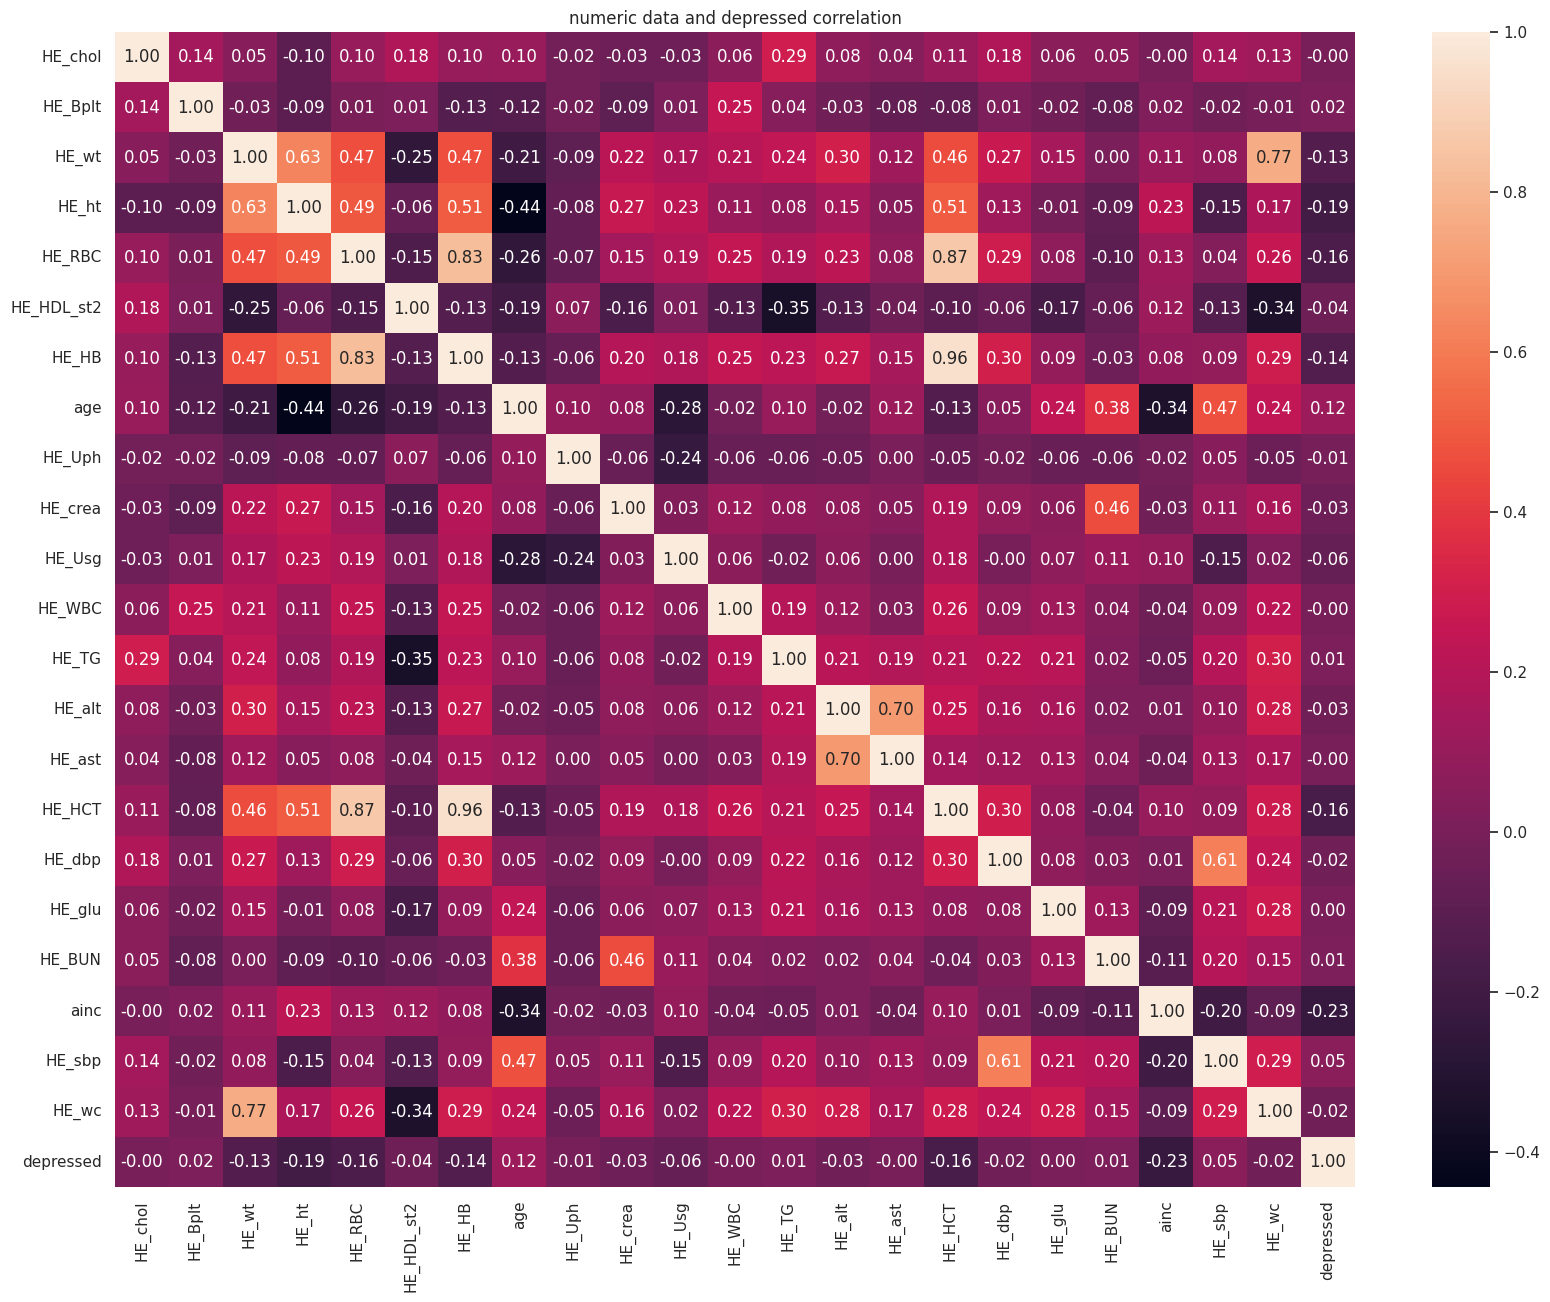

In [39]:
df_num = pd.concat([df_new[num_features],y_over], axis=1)
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')
plt.title("numeric data and depressed correlation")
plt.show()

## label features의 상관관계

- 사용 features

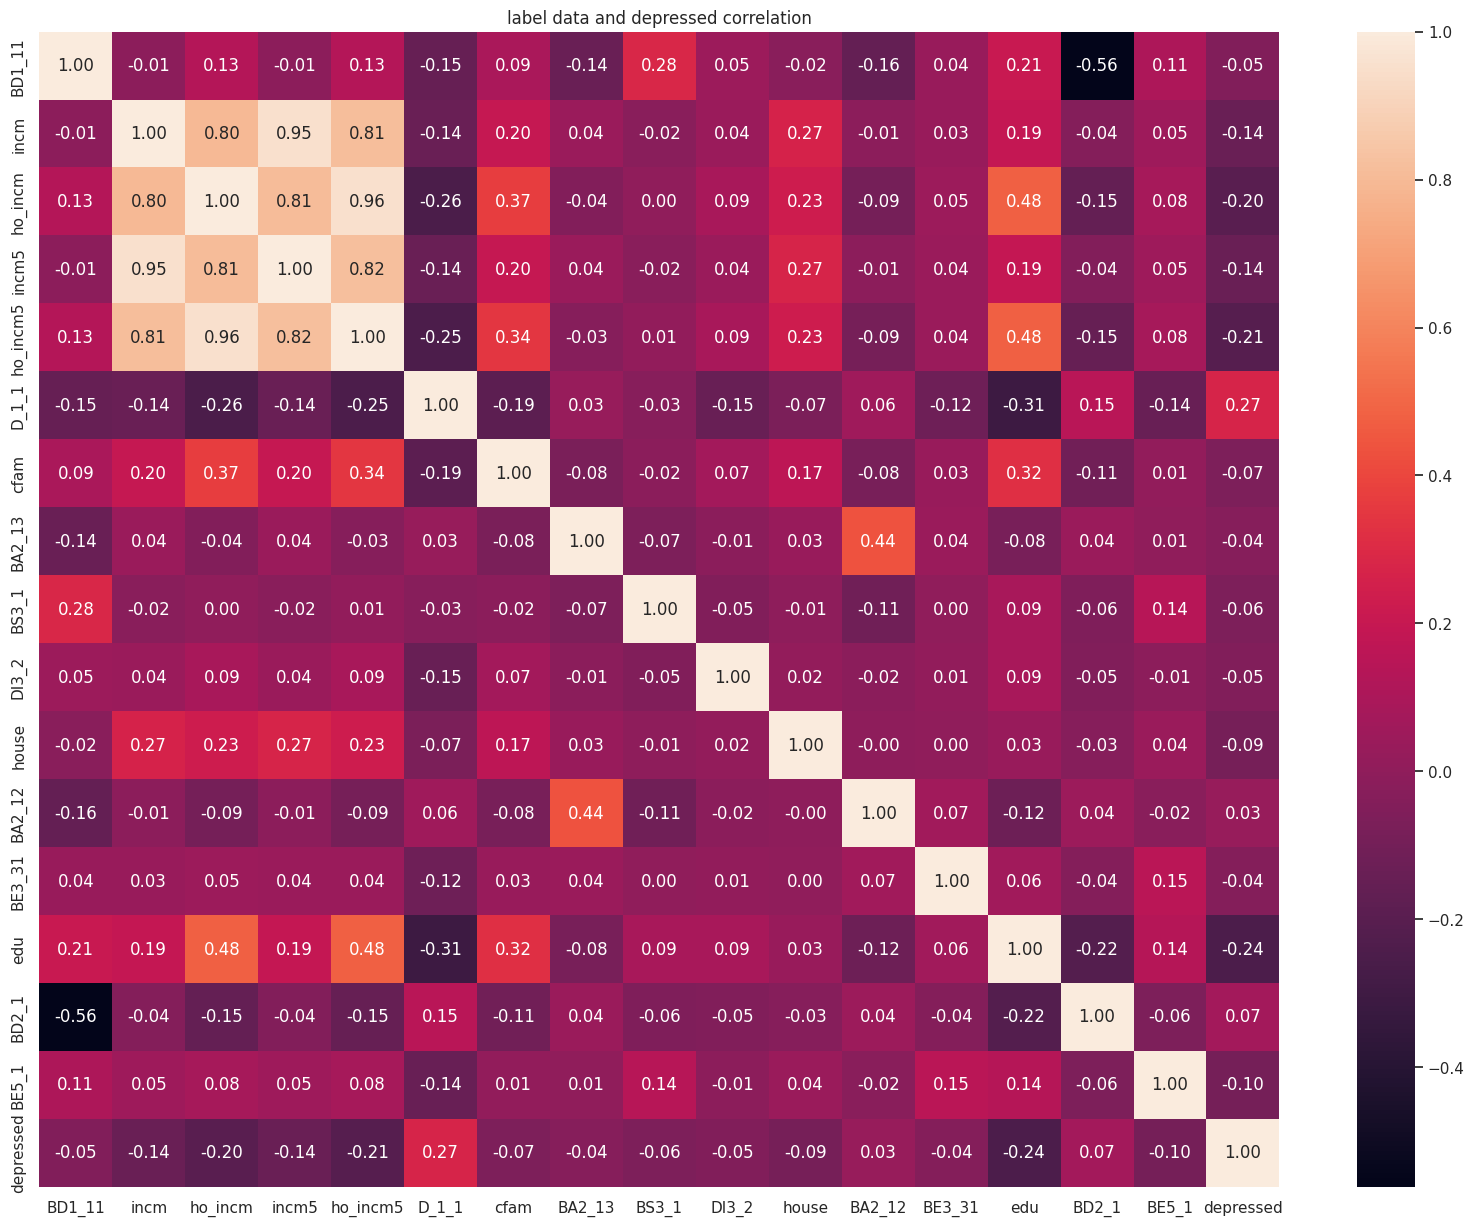

In [41]:
df_label = pd.concat([df_new[label_features],y_over], axis=1)
sns.heatmap(df_label.corr(), annot=True, fmt='.2f')
plt.title("label data and depressed correlation")
plt.show()

## OneHot Features의 상관관계

- 사용 features

In [42]:
df_onehot = df_new.drop(num_features+label_features, axis=1)
df_onehot = pd.concat([df_onehot,y_over],axis=1)

- 상관관계가 0.15보다 높은 값만 선택합니다.

In [43]:
correlation_matrix = df_onehot.corr()
threshold = 0.15

relevant_corr = correlation_matrix['depressed'][correlation_matrix['depressed'].abs() > threshold]

relevant_corr_matrix = df_onehot[relevant_corr.index].corr()

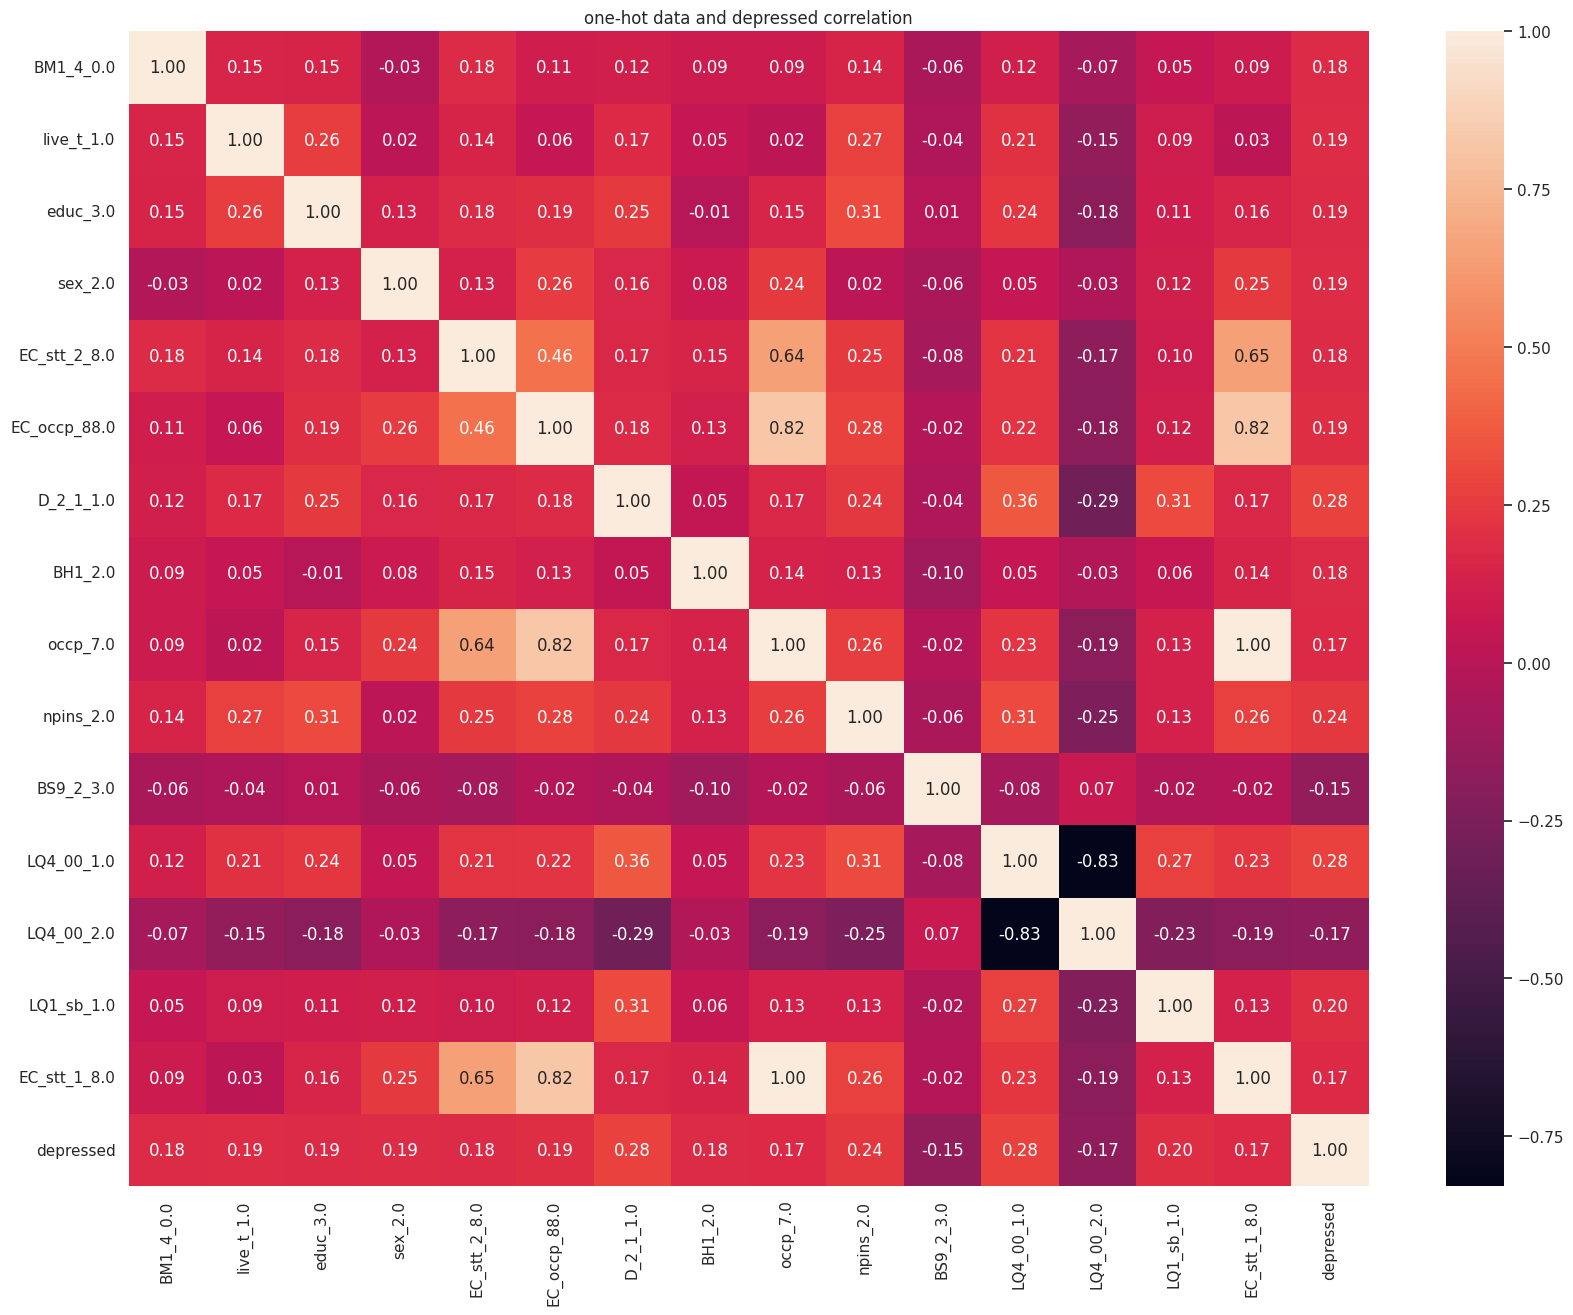

In [44]:
# sns.set(rc={'figure.figsize':(25,20)})

sns.heatmap(relevant_corr_matrix, annot=True, fmt='.2f')
plt.title("one-hot data and depressed correlation")
plt.show()

depressed와 유의미하게 관계가 있는 features는 존재하지 않는것 같습니다. 따라서 머신러닝 모델에서는 성능이 그렇게 좋지는 않을 것으로 위 관계만 본다면 미리 예상 가능하고, 하지만 feature가 많은게 어떤 변수를 가져올지는 모르겠습니다.